In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('CSA.csv', encoding = 'latin1')
relevant = ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP',
     'STATUS', 'PRODUCTLINE', 'COUNTRY', 'DEALSIZE']
df = df[relevant]
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,MSRP,STATUS,PRODUCTLINE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,95,Shipped,Motorcycles,USA,Small
1,10121,34,81.35,2765.90,95,Shipped,Motorcycles,France,Small
2,10134,41,94.74,3884.34,95,Shipped,Motorcycles,France,Medium
3,10145,45,83.26,3746.70,95,Shipped,Motorcycles,USA,Medium
4,10159,49,100.00,5205.27,95,Shipped,Motorcycles,USA,Medium


In [6]:
print("Shape: ", df.shape)

Shape:  (2823, 9)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   SALES            2823 non-null   float64
 4   MSRP             2823 non-null   int64  
 5   STATUS           2823 non-null   object 
 6   PRODUCTLINE      2823 non-null   object 
 7   COUNTRY          2823 non-null   object 
 8   DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 198.6+ KB


In [8]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,3553.889072,100.715551
std,92.085478,9.741443,20.174277,1841.865106,40.187912
min,10100.000000,6.000000,26.880000,482.130000,33.000000
25%,10180.000000,27.000000,68.860000,2203.430000,68.000000
50%,10262.000000,35.000000,95.700000,3184.800000,99.000000
75%,10333.500000,43.000000,100.000000,4508.000000,124.000000
max,10425.000000,97.000000,100.000000,14082.800000,214.000000


In [9]:
print("Missing:\n", df.isnull().sum())

Missing:
 ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
SALES              0
MSRP               0
STATUS             0
PRODUCTLINE        0
COUNTRY            0
DEALSIZE           0
dtype: int64


In [12]:
print("Duplicates: ", df.duplicated().sum())

Duplicates:  0


In [14]:
df.dtypes

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
SALES              float64
MSRP                 int64
STATUS              object
PRODUCTLINE         object
COUNTRY             object
DEALSIZE            object
dtype: object

In [15]:
df['DISCOUNT'] = df['MSRP'] - df['PRICEEACH'] / df['MSRP']
df['IS_BIG_DEAL'] = df['DEALSIZE'].apply(lambda x: 1 if x == 'Large' else 0)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,MSRP,STATUS,PRODUCTLINE,COUNTRY,DEALSIZE,DISCOUNT,IS_BIG_DEAL
0,10107,30,95.70,2871.00,95,Shipped,Motorcycles,USA,Small,93.992632,0
1,10121,34,81.35,2765.90,95,Shipped,Motorcycles,France,Small,94.143684,0
2,10134,41,94.74,3884.34,95,Shipped,Motorcycles,France,Medium,94.002737,0
3,10145,45,83.26,3746.70,95,Shipped,Motorcycles,USA,Medium,94.123579,0
4,10159,49,100.00,5205.27,95,Shipped,Motorcycles,USA,Medium,93.947368,0


In [19]:
categorical_cols = ['STATUS', 'PRODUCTLINE', 'COUNTRY', 'DEALSIZE']

df_encoded = pd.get_dummies(df, columns = categorical_cols, drop_first = True).astype(int)
df_encoded.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,MSRP,DISCOUNT,IS_BIG_DEAL,STATUS_Disputed,STATUS_In Process,STATUS_On Hold,...,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,DEALSIZE_Medium,DEALSIZE_Small
0,10107,30,95,2871,95,93,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,10121,34,81,2765,95,94,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,10134,41,94,3884,95,94,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10145,45,83,3746,95,94,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,10159,49,100,5205,95,93,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [20]:
from sklearn.preprocessing import StandardScaler

features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
scaler = StandardScaler()
df_encoded[features] = scaler.fit_transform(df_encoded[features])

df_encoded.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,MSRP,DISCOUNT,IS_BIG_DEAL,STATUS_Disputed,STATUS_In Process,STATUS_On Hold,...,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,DEALSIZE_Medium,DEALSIZE_Small
0,10107,-0.522891,0.570203,-0.370571,-0.142246,93,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,10121,-0.112201,-0.117507,-0.428132,-0.142246,94,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,10134,0.606505,0.521081,0.179512,-0.142246,94,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10145,1.017195,-0.019263,0.104575,-0.142246,94,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,10159,1.427884,0.815814,0.896847,-0.142246,93,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [21]:
x = df_encoded[features]

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(x)

df_encoded['SEGMENT'] = kmeans.labels_
df_encoded[['SEGMENT']].head()

,SEGMENT
0,0
1,0
2,2
3,2
4,2


In [24]:
df_encoded.groupby('SEGMENT')[features].mean()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
SEGMENT,,,,
0,-0.765824,0.582668,-0.232357,0.314791
1,0.016505,-1.189390,-0.784688,-0.905497
2,0.885448,0.695569,1.187469,0.681696


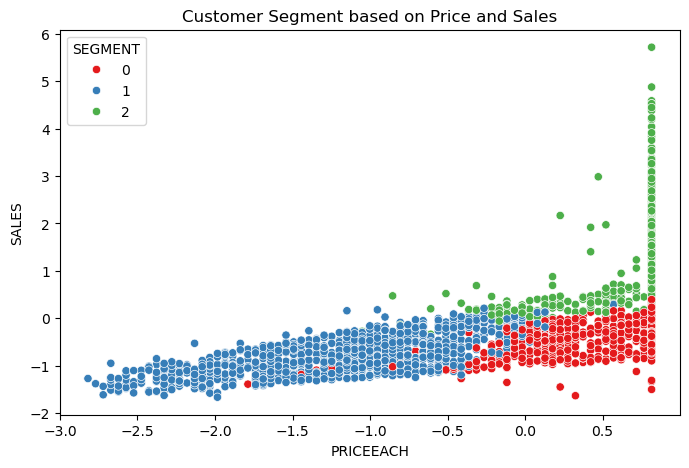

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))
sns.scatterplot( x = 'PRICEEACH', y = 'SALES', hue = 'SEGMENT', data = df_encoded, palette = 'Set1')
plt.title("Customer Segment based on Price and Sales")
plt.show()

In [26]:
df_encoded.to_csv('Analysed_CSA.csv', index = False)